# Pandas Review Series 
***
## Essential Basic Functionality 
<https://pandas.pydata.org/docs/user_guide/basics.html>

In [3]:
import pandas as pd
import numpy as np

## Pop / Del

In [17]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6]), ("C", [7, 8, 9])]))
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [18]:
df.pop("A") # can only del one column at a time
# del df['A']
df # this is an inplace operation. So be careful

,B,C
0,4,7
1,5,8
2,6,9


## Insert

In [19]:
df.insert(1, 'D', [10, 11, 12])
df

,B,D,C
0,4,10,7
1,5,11,8
2,6,12,9


## **Assign**

In [23]:
df.assign(ratio = df['B'] / df['D']).head()
# df.head() # will not change the original dataframe

,B,D,C,ratio
0,4,10,7,0.400000
1,5,11,8,0.454545
2,6,12,9,0.500000


> Assign always returns a copy of the data, leaving the original intact.

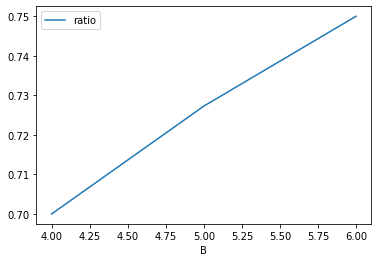

In [28]:
_ = (
    df.
    assign(ratio = lambda x: x.C / x.D).
    plot(x='B', y='ratio')
)


In [29]:
df.assign(E = lambda x: x['B'] / x['C'], F = lambda x: x['D'] / x['E'])
# In this case, order is very important. 

,B,D,C,E,F
0,4,10,7,0.571429,17.5
1,5,11,8,0.625000,17.6
2,6,12,9,0.666667,18.0


## Broadcasting Rule - Row wise

In [30]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.039968,2.080727,1.735746,0.340337
2,-0.766498,-0.123341,2.535067,2.053494
3,1.010476,1.564090,1.587150,1.337368
4,1.745032,1.860322,2.344388,-0.274728
5,-1.343209,1.049097,3.181898,-0.472158
6,0.323276,1.456224,0.956776,1.246004
7,-0.489649,1.795779,1.458127,1.303362
8,-0.682720,-0.076966,1.345046,-0.893977
9,-0.663216,1.410288,1.091876,2.148336


> To achieve certain broadcasting rule, it's preferred to use `add`, `sub`, `mul`, `div`, `mod`, `eq`, `ne`, `lt`, `gt`, `le`, `ge` where axis can be assigned to `columns` or `index`.

In [38]:
df.mod(df.iloc[0], axis='columns')

,A,B,C,D
0,0.000000,-0.000000,-0.000000,-0.000000
1,0.022055,-0.698182,-0.733450,-0.377530
2,0.005882,-0.123341,-1.168727,-0.100106
3,0.045001,-1.214819,-0.882046,-0.098365
4,0.007176,-0.918587,-0.124808,-0.274728
5,0.008457,-0.340357,-0.521896,-0.472158
6,0.033634,-1.322685,-0.277822,-0.189730
7,0.089637,-0.983130,-1.011069,-0.132372
8,0.089661,-0.076966,-1.124150,-0.176111
9,0.012617,-1.368621,-0.142722,-0.005264


## Boolean Operations

In [34]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]})
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]})
df1 | df2 #, df1 & df2, df1 ^ df2, - df1

,a,b
0,1,1
1,1,1
2,1,1


## Linkage with Numpy

In [35]:
df.to_numpy()

array([[ 0.09654755, -1.38945443, -1.23459796, -0.71786665],
       [-0.94342023,  0.69127255,  0.50114829, -0.37753012],
       [-0.66995082, -1.51279571,  1.30046912,  1.33562745],
       [ 1.10702376,  0.17463551,  0.35255163,  0.6195014 ],
       [ 1.84157922,  0.47086745,  1.10978991, -0.99259418],
       [-1.24666096, -0.34035695,  1.94730015, -1.19002425],
       [ 0.41982403,  0.06676941, -0.2778224 ,  0.52813702],
       [-0.39310121,  0.40632414,  0.22352914,  0.58549506],
       [-0.58617198, -1.46642092,  0.11044807, -1.61184387],
       [-0.56666844,  0.02083337, -0.14272157,  1.43046916]])

Also, `df.array` returns an array for the values. 

## Any & All

In [42]:
(df > 0).any(axis='index')
(df > 0).any(axis='columns')
(df > 0).all(axis='index')
(df > 0).all(axis='columns')

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

## Unfamiliar Operations
- prod: Product of values
- std: Bessel-corrected sample standard deviation
- var: Unbiased variance
- sem: Standard error of the mean
- skew: Sample skewness (3rd moment)
- kurt: Sample kurtosis (4th moment)
- quantile: Sample quantile (value at %)
- cumsum: Cumulative sum
- cumprod: Cumulative product
- cummax: Cumulative maximum
- cummin: Cumulative minimum

## Index of Max and Min

In [48]:
df.idxmax(axis='index') # also, pandas has idxmin

A    4
B    1
C    5
D    9
dtype: int64

## Value Count

In [49]:
pd.Series(np.random.randint(0, 7, size=50)).value_counts()

3    10
2     8
5     7
6     7
1     6
4     6
0     6
dtype: int64

## **Cut**
- `cut` is based on values.
- `qcut` is based on sample quantiles.

In [51]:
arr = pd.Series(np.random.randn(30))
factor = pd.qcut(arr, [0, 0.5, 1])
factor

0     (-2.2479999999999998, -0.0533]
1                     (-0.0533, 1.9]
2                     (-0.0533, 1.9]
3     (-2.2479999999999998, -0.0533]
4                     (-0.0533, 1.9]
5                     (-0.0533, 1.9]
6                     (-0.0533, 1.9]
7     (-2.2479999999999998, -0.0533]
8                     (-0.0533, 1.9]
9                     (-0.0533, 1.9]
10    (-2.2479999999999998, -0.0533]
11    (-2.2479999999999998, -0.0533]
12                    (-0.0533, 1.9]
13                    (-0.0533, 1.9]
14    (-2.2479999999999998, -0.0533]
15                    (-0.0533, 1.9]
16    (-2.2479999999999998, -0.0533]
17                    (-0.0533, 1.9]
18                    (-0.0533, 1.9]
19    (-2.2479999999999998, -0.0533]
20    (-2.2479999999999998, -0.0533]
21    (-2.2479999999999998, -0.0533]
22                    (-0.0533, 1.9]
23                    (-0.0533, 1.9]
24    (-2.2479999999999998, -0.0533]
25                    (-0.0533, 1.9]
26    (-2.2479999999999998, -0.0533]
2

## Pipe

In [52]:
def func1(df):
    return df[['B', 'C']]

df.pipe(func1)

,B,C
0,-1.389454,-1.234598
1,0.691273,0.501148
2,-1.512796,1.300469
3,0.174636,0.352552
4,0.470867,1.109790
5,-0.340357,1.947300
6,0.066769,-0.277822
7,0.406324,0.223529
8,-1.466421,0.110448
9,0.020833,-0.142722


## Aggregation & Apply

In [54]:
df.agg(['mean', 'sum', 'std', 'skew'])

,A,B,C,D
mean,-0.094100,-0.287833,0.389009,-0.039063
sum,-0.940999,-2.878326,3.890094,-0.390629
std,0.967598,0.853552,0.898204,1.078976
skew,1.003004,-0.654303,0.031429,-0.016656


In [53]:
df.apply(np.mean, axis='index')

A   -0.094100
B   -0.287833
C    0.389009
D   -0.039063
dtype: float64

## Transform
Element-wise operation. Can have multiple functions. 

In [61]:
df.transform({'A': np.abs, 'B': [lambda x: x + 1, 'sqrt']})

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A         B          
   absolute  <lambda>      sqrt
0  0.096548 -0.389454       NaN
1  0.943420  1.691273  0.831428
2  0.669951 -0.512796       NaN
3  1.107024  1.174636  0.417894
4  1.841579  1.470867  0.686198
5  1.246661  0.659643       NaN
6  0.419824  1.066769  0.258398
7  0.393101  1.406324  0.637436
8  0.586172 -0.466421       NaN
9  0.566668  1.020833  0.144338

## Reindexing & Labeling
`reindex` is based on existing index. Further, there is a `reindex_like` function.

In [67]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s.reindex(['e', 'b', 'f', 'd'], method='ffill') # bfill, nearest

e    0.560290
b    1.278506
f    0.560290
d    0.704435
dtype: float64

## Drop

In [69]:
df.drop(['A'], axis='columns')

,B,C,D
0,-1.389454,-1.234598,-0.717867
1,0.691273,0.501148,-0.377530
2,-1.512796,1.300469,1.335627
3,0.174636,0.352552,0.619501
4,0.470867,1.109790,-0.992594
5,-0.340357,1.947300,-1.190024
6,0.066769,-0.277822,0.528137
7,0.406324,0.223529,0.585495
8,-1.466421,0.110448,-1.611844
9,0.020833,-0.142722,1.430469


## Rename

In [71]:
df.rename({"A": "foo", "B": "bar"}, axis="columns")

,foo,bar,C,D
0,0.096548,-1.389454,-1.234598,-0.717867
1,-0.943420,0.691273,0.501148,-0.377530
2,-0.669951,-1.512796,1.300469,1.335627
3,1.107024,0.174636,0.352552,0.619501
4,1.841579,0.470867,1.109790,-0.992594
5,-1.246661,-0.340357,1.947300,-1.190024
6,0.419824,0.066769,-0.277822,0.528137
7,-0.393101,0.406324,0.223529,0.585495
8,-0.586172,-1.466421,0.110448,-1.611844
9,-0.566668,0.020833,-0.142722,1.430469


## **Access Datetime**
`dt` can only apply to `Series`

In [81]:
s = pd.Series(pd.date_range('2020-01-01', periods=10, freq='B'))
s.dt.year

0    2020
1    2020
2    2020
3    2020
4    2020
5    2020
6    2020
7    2020
8    2020
9    2020
dtype: int64

## String Treatment

In [83]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string")
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

## Sorting
`sort_index`, `sort_values` (by)

In [84]:
df['A'].nsmallest(3) # nlargest

5   -1.246661
1   -0.943420
2   -0.669951
Name: A, dtype: float64

## Dtype Conversion
`to_numeric`, `to_datetime`, `to_Timedelta`

In [86]:
m = ['1.1', 'a', 1.0, 0.8]
pd.to_numeric(m, errors='coerce')

array([1.1, nan, 1. , 0.8])

`select_dtypes`: select certain type columns.